In [68]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dolphins_data_import.ipynb
import sys
sys.path.append('../')
from Functions import *
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [69]:
num_samples = 62
alpha = 2
alpha_prior = 2
dim = 8

In [70]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_prior = np.zeros(len(random_numbers_matrix))
True_negativ_prior = np.zeros(len(random_numbers_matrix))
False_posetiv_prior = np.zeros(len(random_numbers_matrix))
False_negativ_prior = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

True_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))

Accuracy = np.zeros(len(random_numbers_matrix))
Accuracy_prior = np.zeros(len(random_numbers_matrix))
Accuracy_baseline = np.zeros(len(random_numbers_matrix))
Accuracy_stupid_baseline = np.zeros(len(random_numbers_matrix))


for s in range(len(random_numbers_matrix)):
    Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 200
    grad = 0
    points_copy = copy.deepcopy(points)
    points_copy_prior = copy.deepcopy(points)
    grad_sum = 0 # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.001: # stopping criteria
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy_prior,alpha_prior)
            grad_sum += np.sum((grad_now)**2)
            points_copy_prior[i] += LR(k)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum
        grad_sum = 0
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int),0]
    point_a = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv_prior[s] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv_prior[s] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ_prior[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value < 0))
    False_negativ_prior[s] = np.sum((connections*sigmoid_value >= 0) & (connections*sigmoid_value < 0.5))

    prev_grad = 200
    grad = 0
    k = 0
    while abs(prev_grad - grad) > 0.001: # stopping criteria
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum += np.sum((grad_now)**2)
            points_copy[i] += LR(k)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum
        grad_sum = 0
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int),0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value < 0))
    False_negativ[s] = np.sum((connections*sigmoid_value >= 0) & (connections*sigmoid_value < 0.5))

    Baseline = Baseline_function(Y,random_numbers_matrix[s].flatten().astype(int),Y_updated)
    True_posetiv_baseline[s] = np.sum(connections*Baseline >= 0.5)
    False_posetiv_baseline[s] = np.sum(connections*Baseline <= -0.5)
    True_negativ_baseline[s] = np.sum((connections*Baseline > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ_baseline[s] = np.sum((connections*Baseline > 0) & (connections*sigmoid_value < 0.5))

    True_posetiv_stupid_baseline[s] = np.sum(connections*159/len(Y) >= 0.5)
    False_posetiv_stupid_baseline[s] = np.sum(connections*159/len(Y) <= -0.5)
    True_negativ_stupid_baseline[s] = np.sum((connections*159/len(Y) > -0.5) & (connections*159/len(Y) <= 0))
    False_negativ_stupid_baseline[s] = np.sum((connections*159/len(Y) > 0) & (connections*159/len(Y) < 0.5))

    Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))
    Accuracy_prior[s] = (True_posetiv_prior[s]+True_negativ_prior[s])/(len(sigmoid_value))
    Accuracy_baseline[s] = (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(Baseline))
    Accuracy_stupid_baseline[s] = (True_posetiv_stupid_baseline[s]+True_negativ_stupid_baseline[s])/(len(Baseline))

    print(s)

0
1
2
3
4


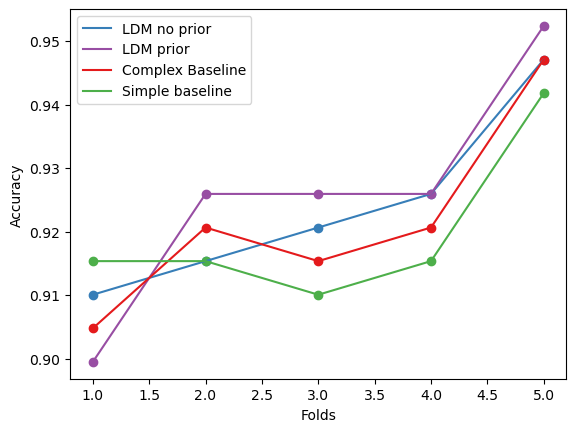

In [73]:
x = [1,2,3,4,5]
plt.plot(x,Accuracy,label='LDM no prior', color = '#377eb8')
plt.plot(x,Accuracy_prior, label='LDM prior', color = '#984ea3')
plt.plot(x,Accuracy_baseline, label='Complex Baseline', color = '#e41a1c')
plt.plot(x,Accuracy_stupid_baseline, label='Simple baseline', color = '#4daf4a')
plt.scatter(x, Accuracy, facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(x, Accuracy_prior, facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(x, Accuracy_baseline, facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(x, Accuracy_stupid_baseline, facecolors='#4daf4a', edgecolors='#4daf4a')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.legend()
plt.show()